# 4) 구현 내용 설명

### pandas import 하기

In [1]:
# (오픈소스)
import pandas as pd

### 엑셀파일 열기

In [2]:
# 엑셀 파일 열어보기(오픈소스)
new_Companion_Animals_Suwon = pd.read_excel('경기도_수원시_반려동물등록현황_20191010.xlsx',
                                             usecols = 'C, D, E, F, G', encoding='utf-8')

# 파일을 사용하기 쉬운 변수로 바꾸기(직접구현)
Chart_0 = new_Companion_Animals_Suwon

# 파일 앞부분 출력해보기(오픈소스)
Chart_0.head(3) 

,구청명,법정동명,등록품종수,등록개체수,소유자수
0,권선구,탑동,57,1169,872
1,권선구,평동,29,117,91
2,권선구,고색동,46,818,615


### 반려동물 개체수 많은 순으로 정렬하기

In [3]:
# 순위 표시용 리스트 만들기(직접구현)
list = []
for i in range(1, 56):
    list.append(i)
    i+=1
    
print(list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]


In [4]:
# 반려동물 개체수 많은 순으로 정렬하기(Chart_1) (오픈소스)
Chart_1 = Chart_0.sort_values( by = '등록개체수', ascending = False)

# 나중 데이터 정리를 쉽게 하기 위해 데이터의 인덱스 바꾸기, 요소 '순위' 추가하기(오픈소스)
Chart_1.index = Chart_1['법정동명']
Chart_1['순위']= list

# Chart_1 앞부분 출력해보기(오픈소스)
Chart_1.head(3)

,구청명,법정동명,등록품종수,등록개체수,소유자수,순위
법정동명,,,,,,
매탄동,영통구,매탄동,78,4321,3434,1
권선동,권선구,권선동,74,4003,3074,2
정자동,장안구,정자동,73,3798,3034,3


In [5]:
#새 표의 순위, 법정동명, 등록개체수만 따로 표시하기(오픈소스)
Chart_fin_1 = Chart_1.loc[:, ['순위', '법정동명', '등록개체수']]
Chart_fin_1.index = list

#최종 표인 Chart_fin_1 앞부분 출력해보기(오픈소스)
Chart_fin_1.head(3)

,순위,법정동명,등록개체수
1,1,매탄동,4321
2,2,권선동,4003
3,3,정자동,3798


In [6]:
#입력 동의 반려동물 개체수 정보를 주는 함수 만들기(직접구현)
def number_of_companion_animals(place):
    a = Chart_1.loc[place, '등록개체수']
    b = Chart_1.loc[place, '순위']
    if 1 <= b <=18:
        c = '많은'
        
    elif 19 <= b <= 37:
        c = '보통인'
    
    else:
        c = '적은'
        
    res = "{}은 반려동물 등록 개체수가 {} 마리로, 수원시 기준 {}번째로 많으며 개체수가 {} 편입니다.".format(place, a, b, c)
    return res

### 한 사람이 평균적으로 기르는 반려동물 수 많은 순으로 정렬하기 

In [7]:
# 등록개체수/소유자수 계산해서 새 표 Chart_2에 추가하기(오픈소스)
Chart_2 = Chart_0
Chart_2['한사람당동물수']=Chart_2['등록개체수']/Chart_2['소유자수']

#등록개체수/소유자수 큰 순서대로 정렬하기(오픈소스)
Chart_2 = Chart_2.sort_values( by = '한사람당동물수', ascending = False)

#hart_2의 index를 법정동명으로 바꾸고, 순위 추가하기(오픈소스)
Chart_2.index = Chart_2['법정동명']
Chart_2['순위']= list
Chart_2.head(3)

,구청명,법정동명,등록품종수,등록개체수,소유자수,한사람당동물수,순위
법정동명,,,,,,,
매산로1가,팔달구,매산로1가,28,149,89,1.674157,1
교동,팔달구,교동,34,168,106,1.584906,2
하광교동,장안구,하광교동,13,19,12,1.583333,3


In [8]:
#Chart_2의 순위, 법정동명, 한사람당동물수만 따로 표시하기(오픈소스)
Chart_fin_2 = Chart_2.loc[:, ['순위', '법정동명', '한사람당동물수']]
Chart_fin_2.index = list

#최종 표인 Chart_fin_2 앞부분 출력해보기(오픈소스)
Chart_fin_2.head(3)

,순위,법정동명,한사람당동물수
1,1,매산로1가,1.674157
2,2,교동,1.584906
3,3,하광교동,1.583333


In [9]:
# 입력 동의 한사람당 기르는 평균 반려동물 개체수 정보를 알려주는 함수(직접구현)

def number_of_animals_number_of_people_ratio(place):
    a = Chart_2.loc[place, '한사람당동물수']
    b = Chart_2.loc[place, '순위']
    if 1 <= b <=18:
        c = '높은'
        
    elif 19 <= b <= 37:
        c = '보통인'
    
    else:
        c = '낮은'
        
    res = "{}은 한사람이 키우는 반려동물 개체수가 평균 {:4f}마리로, 수원시 기준 {} 번째로 높으며 그 수치가 {} 편입니다.".format(place, a, b, c)
    return res

### 반려동물 품종수 많은 순으로 정렬하기

In [10]:
#반려동물 품종수 많은 순서대로 정렬하기(Chart_3) (오픈소스)
Chart_3 = Chart_0.sort_values( by = '등록품종수', ascending = False)

#index를 법정동명으로 바꾸고, 요소 '순위' 추가하기(오픈소스)
Chart_3.index = Chart_3['법정동명']
Chart_3['순위']= list

# 새 표 Chart_3 앞부분 출력해보기(오픈소스)
Chart_3.head(3)

,구청명,법정동명,등록품종수,등록개체수,소유자수,한사람당동물수,순위
법정동명,,,,,,,
세류동,권선구,세류동,80,2981,2219,1.343398,1
매탄동,영통구,매탄동,78,4321,3434,1.258299,2
권선동,권선구,권선동,74,4003,3074,1.302212,3


In [11]:
#Chart_3의 순위, 법정동명, 등록품종수만 따로 표시하기(오픈소스)
Chart_fin_3 = Chart_3.loc[:, ['순위', '법정동명', '등록품종수']]
Chart_fin_3.index = list

#최종 표인 Chart_fin_3 앞부분 출력해보기(오픈소스)
Chart_fin_3.head(3)

,순위,법정동명,등록품종수
1,1,세류동,80
2,2,매탄동,78
3,3,권선동,74


In [12]:
# 입력 동의 반려동물 품종수 정보를 알려주는 함수(직접구현)
def number_of_breed(place):
    a = Chart_3.loc[place, '등록품종수']
    b = Chart_3.loc[place, '순위']
    if 1 <= b <=18:
        c = '많은'
        
    elif 19 <= b <= 37:
        c = '보통인'
    
    else:
        c = '적은'
        
    res = "{}은 등록 품종의 수가 {}종으로, 수원시 기준 {}번째로 많으며 그 종류가 {} 편입니다.".format(place, a, b, c)
    return res

### pandas의 matplotlib을 이용한 함수에서 한글이 지원되지 않아 넣은 부분

In [13]:
# (오픈소스)
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.TTF"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)


### 입력한 동의 반려동물 분포 정보를 알려주는 함수 companion_animal_info() 만들기

In [14]:
# (직접구현)
place_list = Chart_0['법정동명'].values

def companion_animal_info():
    a = input("반려동물 분포 정보를 알고 싶은 수원시 내의 동 한개를 입력해주세요: ")
    
    while(1):
        if a in place_list:
            break
        else:
            a = input("수원시 내의 동 한개를 입력해주세요: ")
    
    X = number_of_companion_animals(a)
    Y = number_of_animals_number_of_people_ratio(a)
    Z = number_of_breed(a)
    
    print("\n<{}의 반려동물 분포 정보입니다>\n".format(a))
    print(X)      
    print(Y)    
    print(Z)
    print()
    
    b = input("다른 동의 반려동물 분포정보를 알고 싶으시면 '1'을, 프로그램을 종료하고 싶으시면 '0'을 입력해주세요 ")
    
    while(1):
        if b == '1':
            companion_animal_info()
            break
            
        elif b == '0':
            print("\n프로그램을 이용해주셔서 감사합니다")
            break
        
        else:
            b = input("1 또는 0을 입력해주세요: ")
            


### 등록개체수, 한사람당동물수, 등록품종수 각각 Top 10 나타내는 그래프 출력함수companion_animal_graph() 만들기

In [15]:
# (직접구현)
def companion_animal_graph(): 
    print("수원시 내 동의 반려동물 개체수 많은 순 Top 10 그래프를 보고 싶으시면 '1'을,")
    print("수원시 내 동의 한사람당 기르는 반려동물수 많은 순 Top 10 그래프를 보고 싶으시면 '2'를,")
    print("수원시 내 동의 등록품종수가 많은 순 Top 10 그래프를 보고 싶으시면 '3'을.")
    print("종료하고 싶으시면 '0'을 입력해주세요: ")
    a = input()
    
    
    if a == '1':
        x = Chart_1['등록개체수'].head(10).sort_values().plot(kind = 'barh', grid = True, figsize = (10, 5))
        plt.show()
        print("<x축: 등록개체수>\n")
        companion_animal_graph()
    elif a == '2':
        x = Chart_2['한사람당동물수'].head(10).sort_values().plot(kind = 'barh', grid = True, figsize = (10, 5))
        plt.show()
        print("<x축: 한사람당 기르는 반려동물수>\n")
        companion_animal_graph()
    elif a == '3':
        x = Chart_3['등록품종수'].head(10).sort_values().plot(kind = 'barh', grid = True, figsize = (10, 5))
        plt.show()
        print("<x축: 등록품종수>\n")
        companion_animal_graph()
    elif a == '0':
        print("\n프로그램을 이용해주셔서 감사합니다")
    else:
        print("\n잘못된 입력입니다!\n")
        companion_animal_graph()

# 5)분석 결과 및 구현 결과

### companion_animal_info() 실행 공간

In [16]:
# kernel을 전체 restart, re-run하면 이 cell에서 함수가 실행됩니다.
companion_animal_info()

반려동물 분포 정보를 알고 싶은 수원시 내의 동 한개를 입력해주세요: 매탄동

<매탄동의 반려동물 분포 정보입니다>

매탄동은 반려동물 등록 개체수가 4321 마리로, 수원시 기준 1번째로 많으며 개체수가 많은 편입니다.
매탄동은 한사람이 키우는 반려동물 개체수가 평균 1.258299마리로, 수원시 기준 47 번째로 높으며 그 수치가 낮은 편입니다.
매탄동은 등록 품종의 수가 78종으로, 수원시 기준 2번째로 많으며 그 종류가 많은 편입니다.

다른 동의 반려동물 분포정보를 알고 싶으시면 '1'을, 프로그램을 종료하고 싶으시면 '0'을 입력해주세요 0

프로그램을 이용해주셔서 감사합니다


실행 예시
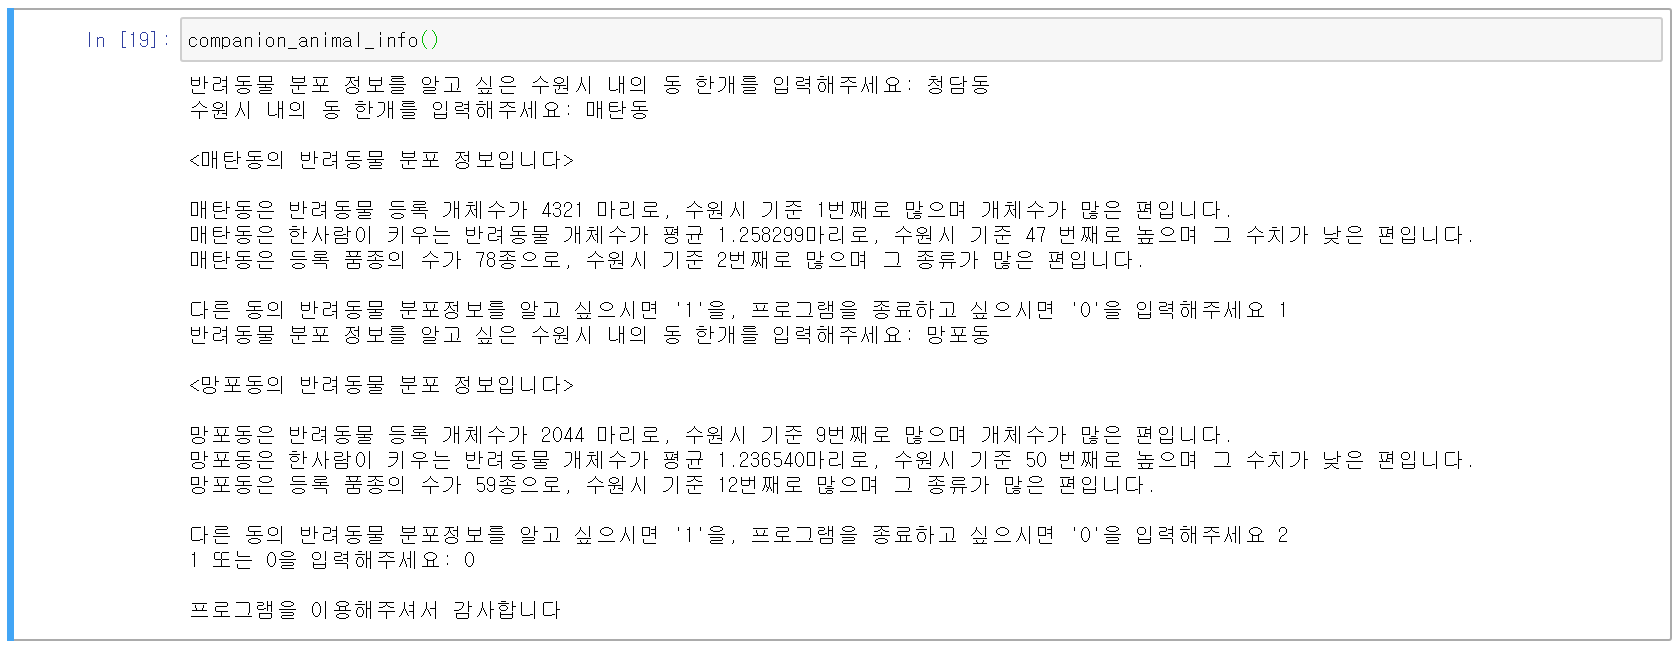

### companion_animal_graph() 실행 공간

In [17]:
# kernel을 전체 restart, re-run하면 companion_animal_info() 함수 실행 이후에 이 함수가 실행됩니다.
companion_animal_graph()

수원시 내 동의 반려동물 개체수 많은 순 Top 10 그래프를 보고 싶으시면 '1'을,
수원시 내 동의 한사람당 기르는 반려동물수 많은 순 Top 10 그래프를 보고 싶으시면 '2'를,
수원시 내 동의 등록품종수가 많은 순 Top 10 그래프를 보고 싶으시면 '3'을.
종료하고 싶으시면 '0'을 입력해주세요: 
0

프로그램을 이용해주셔서 감사합니다


실행 예시
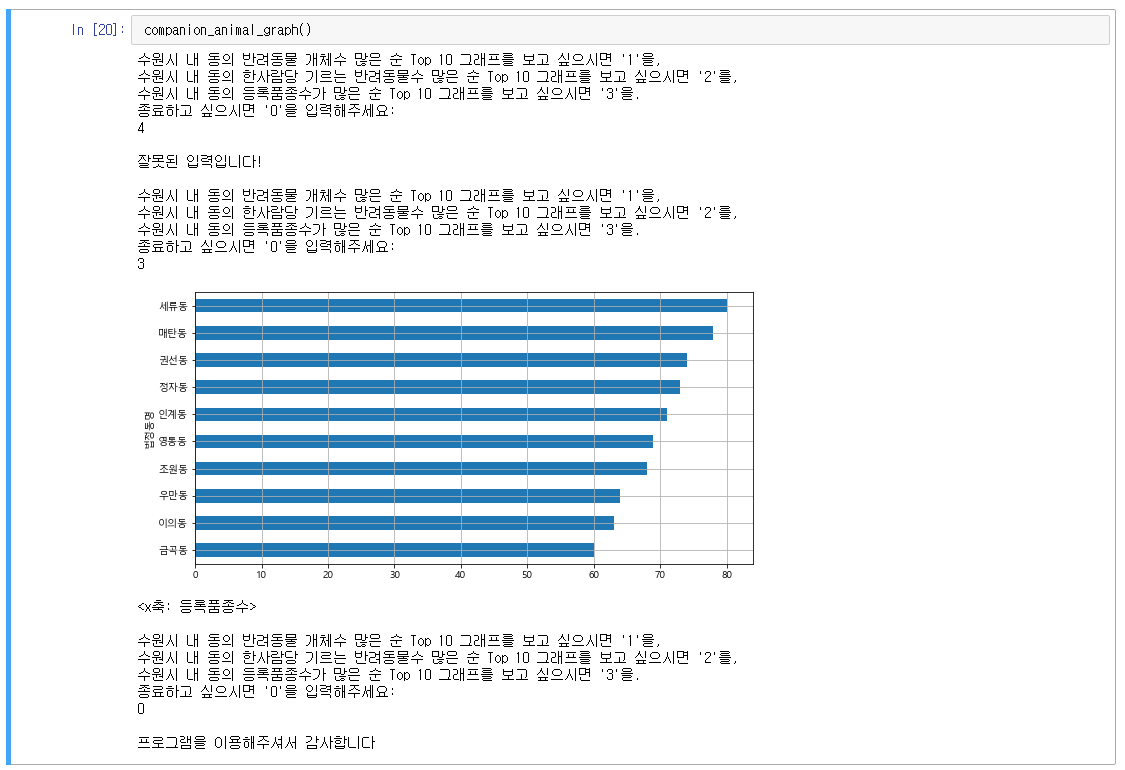

# 10)  4)의 가공한 데이터 원본

### 등록개체수 많은 순으로 정렬한 표

In [18]:
#위의 두 함수가 실행된 뒤에 표가 나올 것입니다.
Chart_fin_1.head(10)

,순위,법정동명,등록개체수
1,1,매탄동,4321
2,2,권선동,4003
3,3,정자동,3798
4,4,영통동,3379
5,5,세류동,2981
6,6,인계동,2619
7,7,조원동,2582
8,8,화서동,2384
9,9,망포동,2044
10,10,우만동,1854


###  한사람이 평균적으로 기르는 동물 수 많은 순으로 정렬한 표

In [19]:
Chart_fin_2.head(10)

,순위,법정동명,한사람당동물수
1,1,매산로1가,1.674157
2,2,교동,1.584906
3,3,하광교동,1.583333
4,4,팔달로1가,1.529412
5,5,북수동,1.514706
6,6,영동,1.500000
7,7,중동,1.500000
8,8,남수동,1.483333
9,9,팔달로3가,1.454545
10,10,이목동,1.443850


### 등록품종수 많은 순으로 정렬한 표

In [20]:
Chart_fin_3.head(10)

,순위,법정동명,등록품종수
1,1,세류동,80
2,2,매탄동,78
3,3,권선동,74
4,4,정자동,73
5,5,인계동,71
6,6,영통동,69
7,7,조원동,68
8,8,우만동,64
9,9,이의동,63
10,10,금곡동,60
